In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file1 = "data/mouse_drug_data.csv"
file2 = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1=pd.read_csv(file1)
df2=pd.read_csv(file2)

# Combine the data into a single dataset
df_combined=df2.merge(df1, on='Mouse ID')

# Display the data table for preview
df_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_group=df_combined.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_df=pd.DataFrame(mean_group)
# Preview DataFrame
mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_group=df_combined.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
sem_df=pd.DataFrame(sem_group)
# Preview DataFrame
sem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean=pd.pivot_table(mean_df,values='Tumor Volume (mm3)', index='Timepoint', columns='Drug' )
# Preview that Reformatting worked
pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#pivot_sem data
pivot_sem=pd.pivot_table(sem_df,values='Tumor Volume (mm3)', index='Timepoint', columns='Drug' )
pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


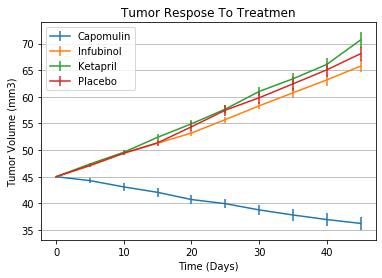

In [6]:
# Generate the Plot (with Error Bars)
drugs=['Capomulin','Infubinol','Ketapril','Placebo']
fig, ax=plt.subplots()
for i in drugs:
    ax.errorbar(pivot_mean.index,pivot_mean[i],yerr=pivot_sem[i],label=i)
plt.legend()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title( 'Tumor Respose To Treatmen')
ax.plot()
plt.grid(axis='y')
plt.show()


In [7]:
fig.savefig('Tumor Response To Treatment')

In [8]:
# Show the Figure
plt.show()

## Mice treated with Capomulin had the most decrase in tumor volume

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ms_mean=df_combined.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
ms_mean_df=pd.DataFrame(ms_mean)
# Preview DataFrame
ms_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ms_sem=df_combined.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
ms_sem_df=pd.DataFrame(ms_sem)
# Preview DataFrame
ms_sem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames

pivot_ms_mean=pd.pivot_table(ms_mean_df,values='Metastatic Sites', index='Timepoint', columns='Drug' )
# Preview that Reformatting worked
pivot_ms_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
pivot_ms_sem=pd.pivot_table(ms_sem_df,values='Metastatic Sites', index='Timepoint', columns='Drug' )
# Preview that Reformatting worked
pivot_ms_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


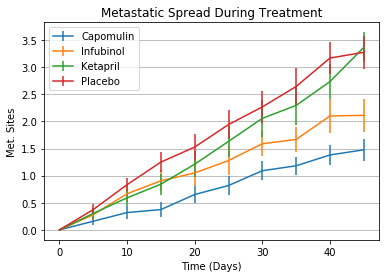

In [13]:
# Generate the Plot (with Error Bars)
fig2, ax=plt.subplots()
for j in drugs:
    ax.errorbar(pivot_ms_mean.index,pivot_ms_mean[j],yerr=pivot_ms_sem[j],label=j)
plt.legend()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title( 'Metastatic Spread During Treatment')
ax.plot()
plt.grid(axis='y')


# Save the Figure
plt.savefig('Metastatic Spread During Treatment')

# Show the Figure
plt.show()

## Mice treated with Katapril had the same number of Metastastic sites as those that were on a Placebo. 

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_group=df_combined.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
count_df=pd.DataFrame(count_group)
# Preview DataFrame
count_df.columns=['Mouse Count']
count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count=pd.pivot_table(count_df,values='Mouse Count', index='Timepoint', columns='Drug' )
# Preview that Reformatting worked
pivot_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
per=pivot_count['Capomulin']/pivot_count['Capomulin'][0]
per

Timepoint
0     1.00
5     1.00
10    1.00
15    0.96
20    0.92
25    0.88
30    0.88
35    0.88
40    0.84
45    0.84
Name: Capomulin, dtype: float64

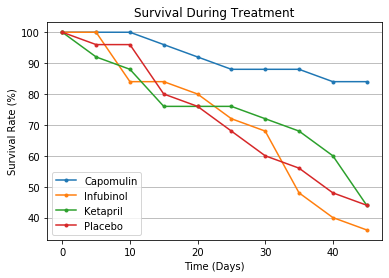

In [17]:
# Generate the Plot (Accounting for percentages)
fig3, ax=plt.subplots()
for k in drugs:
    percentage=(pivot_count[k]/pivot_count[k][0])*100
    ax.plot(pivot_count.index,percentage,label=k, marker='.')
plt.legend()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title( 'Survival During Treatment')
ax.plot()
plt.grid(axis='y')


# Save the Figure
plt.savefig('Survival During Treatment')

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
percent_change=[]

for l in pivot_mean.columns:
    percent=(pivot_mean[l][45]-pivot_mean[l][0])/(pivot_mean[l][0])*100
    percent_change.append([l,percent])
#Display the data to confirm
percent_change_df=pd.DataFrame(percent_change)
percent_change_df.columns=["Drug",'Percent Change']
percent_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [19]:
percent_change2=[]

for z in drugs:
    percent=(pivot_mean[z][45]-pivot_mean[z][0])/(pivot_mean[z][0])*100
    percent_change2.append([z,percent])
#Display the data to confirm
percent_change2_df=pd.DataFrame(percent_change2)
percent_change2_df.columns=["Drug",'Percent Change']
percent_change2_df


,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


## Mice treated with Capomulin had the highest survival rate and the most decreased in tumor volume. 
## Mice treated with Infubinal and Ketapril had similar results as those with the Placebo. 

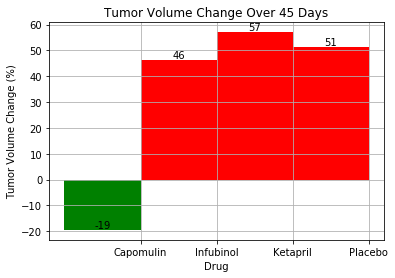

In [20]:
# Store all Relevant Percent Changes into a Tuple
ax=plt.subplot()

# Splice the data between passing and failing drugs
df=percent_change2_df

t1 = df[df['Percent Change']<0]
t2 = df[df['Percent Change']>=0]
t3=df['Percent Change']



one=ax.bar(t1['Drug'], t1['Percent Change'], color='g',width=-1, align='edge',label=t1)
two=ax.bar(t2['Drug'], t2['Percent Change'], color='r',width=-1,align='edge', label=t2)
three=one+two

#Orient widths. Add labels, tick marks, etc. 
rects = ax.patches
labels = ["%d" % i for i in t3]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height,label,
            ha='center', va='bottom')

# Use functions to label the percentages of changes

# Call functions to implement the function calls

ax.set_xlabel("Drug")
ax.set_ylabel("Tumor Volume Change (%)")
ax.set_title('Tumor Volume Change Over 45 Days')

plt.grid(which='major')


# Save the Figure
plt.savefig('Tumor Volume Change Over 45 Days')

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/change.png)